In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv')
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# Spliting Dataset

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('FWI',axis=1)
y= df['FWI']

In [8]:
np.array(X)
np.array(y)

array([ 0.5,  0.4,  0.1,  0. ,  0.5,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,
        7.1,  0.2,  0.4,  0.1,  0. ,  0. ,  0.2,  1.4,  0.4,  2.2,  2.3,
        3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,  0.4,  0.3,  0.5,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  0.5,  2.2,  0.9,  3.4,  0.8,
        0.5,  0.4,  3.6,  6. , 10.9,  4. ,  8.8,  2.8,  2.1,  1.3,  7.3,
       15.3, 15.3, 11.3, 11.9, 10.7, 15.7,  0.9,  0.8,  0.8,  3.9,  6.1,
        6.8,  8. ,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2, 10.6,  6.3,  4.2,
       14.6, 16.1, 17.2, 16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2,
       19.9, 30.2,  4.2,  0.3,  0.1,  0. ,  0. ,  0.5,  1.7,  0.9,  0.6,
        0.4,  0.2,  0.3,  0.3,  0.5,  0. ,  0.1,  0. ,  0.8,  5.9,  7.7,
        9.7,  6.3,  8.3,  2.8,  0.7,  0.7,  0.1,  1.7,  4.1,  0.9,  0.1,
        0.1,  0.2,  0.2,  0.1,  1. ,  0.9,  3.1,  6. ,  0.8,  1.9, 10. ,
       16.7, 12.9,  0.9,  0.3,  0.6,  0.1,  0.4,  0.4,  0.4,  0.3,  4.9,
        1.2,  0.8,  5.3,  6.7,  9.5, 12. , 18.4,  7

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape
corr = X_train.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

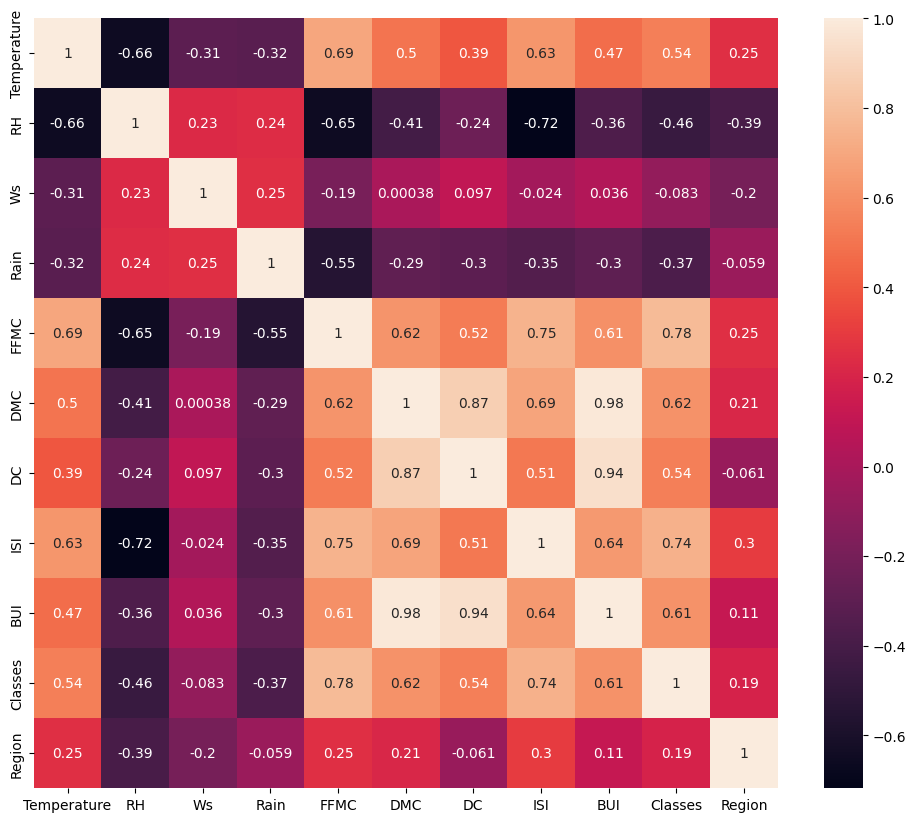

In [10]:

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show

In [11]:
def corelation(dataset, thershold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thershold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_feature = corelation(X_train, 0.95)
corr_feature

{'BUI'}

In [13]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)


In [14]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

# Standarization 

In [15]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_Scaled = scalar.fit_transform(X_train)
X_test_Scaled = scalar.transform(X_test)

<Axes: title={'center': 'After Scaling'}>

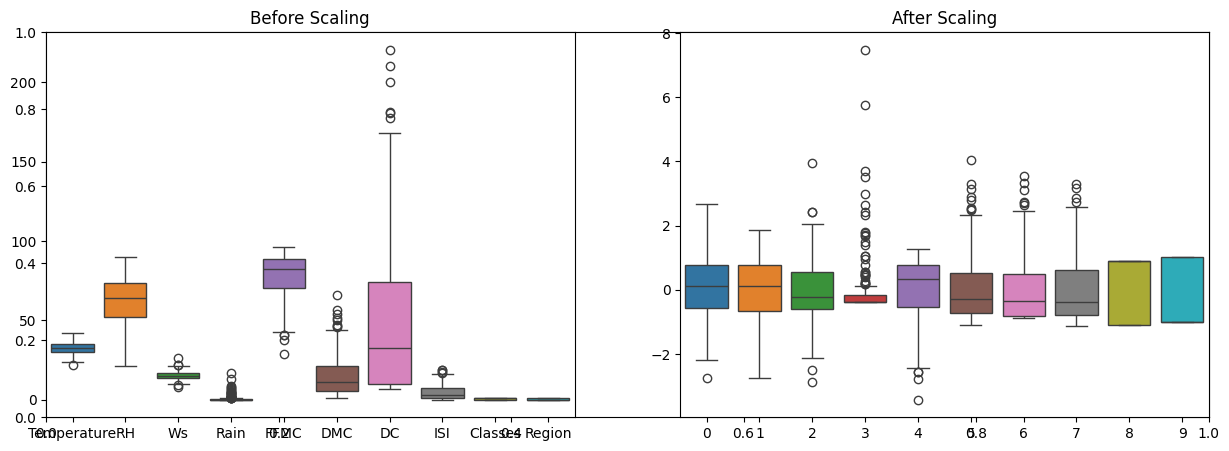

In [16]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title('After Scaling')
sns.boxplot(data=X_train_Scaled)


# Model Traning

In [17]:
from sklearn.linear_model import LinearRegression

Regression = LinearRegression(n_jobs=-1)
Regression.fit(X_train_Scaled,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
y_predicted = Regression.predict(X_test_Scaled)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
MSE = mean_squared_error(y_test,y_predicted)
MAE = mean_absolute_error(y_test,y_predicted)
R2 = r2_score(y_test,y_predicted)

print(f'MSE: {MSE}\nMAE: {MAE}\nR2_Score:{R2}')

MSE: 0.7499258036691264
MAE: 0.5170107980662406
R2_Score:0.9830565611009445


<Axes: ylabel='FWI'>

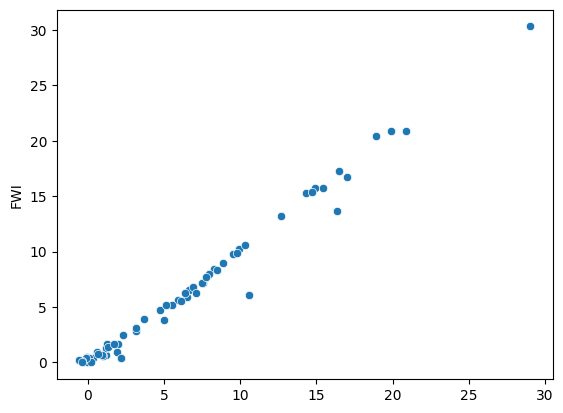

In [20]:
sns.scatterplot(x=y_predicted,y=y_test)

# Lasso Regression 

In [21]:
from sklearn.linear_model import Lasso
lassoreg = Lasso()
lassoreg.fit(X_train_Scaled,y_train)
lassoreg.predict(X_test_Scaled)
MSE = mean_squared_error(y_test,y_predicted)
MAE = mean_absolute_error(y_test,y_predicted)
R2 = r2_score(y_test,y_predicted)

print(f'MSE: {MSE}\nMAE: {MAE}\nR2_Score:{R2}')


MSE: 0.7499258036691264
MAE: 0.5170107980662406
R2_Score:0.9830565611009445


# Rigid Regression

In [22]:
from sklearn.linear_model import Ridge
ridgereg = Ridge()
ridgereg.fit(X_train_Scaled,y_train)
ridgereg.predict(X_test_Scaled)
MSE = mean_squared_error(y_test,y_predicted)
MAE = mean_absolute_error(y_test,y_predicted)
R2 = r2_score(y_test,y_predicted)

print(f'MSE: {MSE}\nMAE: {MAE}\nR2_Score:{R2}')

MSE: 0.7499258036691264
MAE: 0.5170107980662406
R2_Score:0.9830565611009445


# Elastic Regression

In [23]:
from sklearn.linear_model import ElasticNet
ElasticNetreg = ElasticNet()
ElasticNetreg.fit(X_train_Scaled,y_train)
ElasticNetreg.predict(X_test_Scaled)
MSE = mean_squared_error(y_test,y_predicted)
MAE = mean_absolute_error(y_test,y_predicted)
R2 = r2_score(y_test,y_predicted)

print(f'MSE: {MSE}\nMAE: {MAE}\nR2_Score:{R2}')

MSE: 0.7499258036691264
MAE: 0.5170107980662406
R2_Score:0.9830565611009445


In [24]:
scalar

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [26]:
ridgereg

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [28]:
import pickle

pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridgereg,open('ridgereg.pkl','wb'))